# CKP8366 - TÓPICOS AVANÇADOS - APRENDIZAGEM DE MÁQUINA PROBABILÍSTICA

<img  src="https://img.shields.io/badge/UFC_CKP8366-VAUX GOMES-000000?style=for-the-badge&logo=" /> <img src="https://img.shields.io/badge/Jupyter-000000?style=for-the-badge&logo=jupyter&logoColor=white" /> <img src="https://img.shields.io/badge/Python-000000?style=for-the-badge&logo=python&logoColor=white" />


In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal

import seaborn as sns
import matplotlib.pyplot as plt

## Gaussian Mixture Model

In [265]:
class GaussianMixtureModel:
  def __init__(self, K, max_epochs=100, min_diff=1e-6):
    self.K = K
    self.max_epochs = max_epochs
    self.min_diff=max(0, min_diff)
    
  def fit(self, X):
    D, N = X.shape
    
    # Start
    self.means = X[np.random.choice(D, self.K, replace=False)]      # K x N
    self.covariances = np.array([np.eye(N) * 1/self.K**(2/D)] * self.K) # K x (N x N)
    self.weights = np.ones(self.K) / self.K 
    
    print(self.means)
    
    # Debug
    # print(self.means.shape, self.covariances.shape, self.weights.shape)
    
    for _ in range(self.max_epochs):
      # Passo E (Expectation) consiste em computar os coeficientes de responsabilidade
      responsibilities = np.zeros((D, self.K))
      for k in range(self.K):
        responsibilities[:, k] = self.weights[k] * multivariate_normal.pdf(X, self.means[k], np.diag(self.covariances[k]))

      responsibilities /= np.sum(responsibilities, axis=1, keepdims=True) # Com esse keepdims não precisa fazer col por col
      
      # Passo M (Maximization) otimizar parâmetros
      responsibilities_sum = np.sum(responsibilities, axis=0) # K x 1

      # Part I
      self.weights = responsibilities_sum / N # K x 1

      # Part II & III
      for k in range(self.K):
        self.means[k] = np.sum(responsibilities[:, k].reshape((D, 1)) * X, axis=0) / responsibilities_sum[k]
        
        # Não consegui uma versão vetorizada : (
        acc = 0
        for i in range(D):
          acc += responsibilities[i, k] * X[i] @ X[i].T
          
        self.covariances[k] = np.diag(acc/responsibilities_sum[k] - self.means[k]*self.means[k].T)
  
  def __str__(self):
    return f'GaussianMixtureModel: \n(K → {self.k})'

#### Carregamento dos dados

In [267]:
# Data
X = np.genfromtxt('./files/clustering_data.csv', delimiter=',')
# X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) # Normalization 0 ~ 1

In [268]:
gmm = GaussianMixtureModel(6)
gmm.fit(X)
gmm.means

[[  6.59068455  -4.04433145]
 [-10.65622508  -6.55054662]
 [ -7.18238116  -5.34864914]
 [-10.10452702  -7.8882539 ]
 [ -3.59893964   1.56448382]
 [  8.66801617   2.14237333]]


array([[2.35861902, 1.5001798 ],
       [2.34943679, 1.49354498],
       [2.34939616, 1.49351562],
       [2.34950149, 1.49359173],
       [2.3540929 , 1.49690944],
       [2.35655301, 1.49868701]])

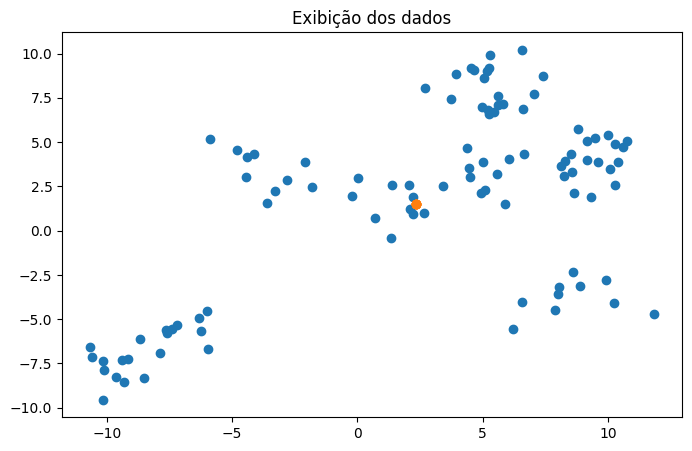

In [269]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0],X[:,1])
plt.scatter(gmm.means[:,0], gmm.means[:,1])
# sns.kdeplot(x=X[:, 0], y=X[:, 1], levels=20, color='k', alpha=0.2)

plt.grid(False)
# plt.axis('off')
plt.title('Exibição dos dados')
plt.show()

In [243]:
# init
K = 3
max_epochs = 100
min_diff = 1e-6

# Preparation
D, N = X.shape

means = X[np.random.choice(D, K, replace=False)]      # K x N
covariances = np.array([np.eye(N) *(1/K**(2/D))] * K) # K x (N x N)
weights = np.ones(K) / K                              # K x 1

X.shape, means.shape, covariances.shape, weights.shape

((100, 2), (3, 2), (3, 2, 2), (3,))

In [244]:
# Expectation
responsibilities = np.zeros((D, K))
for k in range(K):
  responsibilities[:, k] = weights[k] * multivariate_normal.pdf(X, means[k], np.diag(covariances[k]))

responsibilities /= np.sum(responsibilities, axis=1, keepdims=True) # Com esse keepdims não precisa fazer col por col
responsibilities.shape

(100, 3)

In [245]:
# Maximization
responsibilities_sum = np.sum(responsibilities, axis=0) # K x 1

# Part I
weights = responsibilities_sum / N # K x 1

# Part II & III
for k in range(K):
  means[k] = np.sum(responsibilities[:, k].reshape((D, 1)) * X, axis=0) / responsibilities_sum[k]
  
  # Não consegui uma versão vetorizada : (
  acc = 0
  for i in range(D):
    acc += responsibilities[i, k] * X[i] @ X[i].T
    
  covariances[k] = np.diag(acc/responsibilities_sum[k] - means[k]*means[k].T)

In [237]:
# Part II & III
for k in range(K):
  
  aux = 0
  for i in range(D):
    aux += responsibilities[i, k] * X[i] @ X[i].T
  
  covariances[k] = np.diag(aux/responsibilities_sum[k] - means[k]*means[k].T)
  
covariances

array([[[0.47247608, 0.        ],
        [0.        , 0.49922366]],

       [[0.46181676, 0.        ],
        [0.        , 0.46776501]],

       [[0.4811793 , 0.        ],
        [0.        , 0.51592271]]])

In [233]:
covariances

array([[[0.97826739, 0.        ],
        [0.        , 0.97826739]],

       [[0.97826739, 0.        ],
        [0.        , 0.97826739]],

       [[0.97826739, 0.        ],
        [0.        , 0.97826739]]])

In [183]:
a = np.array([[1, 2], [3, 4], [5, 6]])


In [193]:
np.zeros(3)

array([0., 0., 0.])

In [192]:
np.einsum('ij,ik->jk', X, X)/responsibilities_sum[k] - means[k]*(means[k].T)

array([[0.79400969, 0.65701328],
       [0.64399603, 0.69662671]])